## Import library

In [1]:
%matplotlib inline
from pathlib import Path
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

## 讀資料

In [2]:
# Path
TIMESTAMP_PATH = Path("C:/Lab/auo_lab_experiment/timestamp")
LABEL_PATH = Path("C:/Lab/auo_lab_experiment/label/csv")
MISSINGDATA = Path("C:/Lab/auo_lab_experiment/label/disapear_list")
df = pd.read_csv("C:/Lab/auo_lab_experiment/feature_data/feature_data_09_26.csv")

##  Drop Missing Data

In [3]:
missing_list = []
for x in MISSINGDATA.read_text().splitlines():
    missing_list.append(x)
df['missing'] =  df['video_names'].apply(lambda x: x in missing_list)
df.drop(df.loc[df['missing']== True].index, inplace=True)
df = df.reset_index(drop=True)
missing_list

['out2020-02-12_14-28-34',
 'out2020-02-12_14-07-25',
 'out2020-02-06_08-52-09',
 'out2020-02-06_09-13-11',
 'out2020-02-13_14-41-37',
 'out2020-02-13_15-01-38',
 'out2020-02-11_16-12-39',
 'out2020-02-11_15-31-08',
 'out2020-02-11_13-21-04',
 'out2020-02-11_13-43-17',
 'out2020-02-13_16-11-26',
 'out2020-02-13_15-49-08',
 'out2020-02-07_13-28-12',
 'out2020-02-07_13-07-09',
 'out2020-01-31_13-32-23',
 'out2020-02-10_09-20-04',
 'out2020-02-14_13-35-03',
 'out2020-01-20_13-49-59',
 'out2020-01-20_12-37-21',
 'out2020-01-20_13-27-30',
 'out2020-01-20_12-59-21',
 'out2020-02-18_15-17-08',
 'out2020-01-20_17-50-56',
 'out2020-01-22_14-55-39',
 'out2020-02-18_14-55-57',
 'out2020-01-20_12-37-21',
 'out2020-01-20_12-59-21']

In [4]:
df_video_tag = []
for i,videoname in enumerate(df["video_names"]):
    if (i+1) == len(df["video_names"]):
        df_video_tag.append(videoname) 
        break
    if (videoname !=  df["video_names"][i+1]):
        df_video_tag.append(videoname) 

print(f"Len：{len(df_video_tag)}")
df_video_tag

Len：31


['out2020-02-05_16-13-57',
 'out2020-02-04_14-02-51',
 'out2020-02-05_14-02-29',
 'out2020-01-30_15-26-58',
 'out2020-01-31_13-10-13',
 'out2020-01-31_08-34-15',
 'out2020-02-04_14-30-50',
 'out2020-02-11_14-42-33',
 'out2020-02-10_08-57-44',
 'out2020-02-04_13-26-16',
 'out2020-02-14_13-13-49',
 'out2020-02-05_13-40-33',
 'out2020-02-05_15-40-50',
 'out2020-02-05_16-36-55',
 'out2020-02-11_14-20-01',
 'out2020-02-06_14-39-28',
 'out2020-02-07_15-14-00',
 'out2020-02-03_14-23-37',
 'out2020-01-30_15-49-43',
 'out2020-01-20_17-24-17',
 'out2020-02-03_14-45-36',
 'out2020-02-03_13-29-58',
 'out2020-02-05_15-16-07',
 'out2020-02-06_15-11-15',
 'out2020-02-18_13-52-03',
 'out2020-02-03_13-03-20',
 'out2020-01-22_14-34-09',
 'out2020-02-18_13-11-09',
 'out2020-01-21_13-40-59',
 'out2020-01-30_16-18-34',
 'out2020-02-07_14-52-17']

In [5]:
def frame_to_time(frame_number):  
    return int(frame_number)/20

## 讀Label資料

In [6]:
key_list_label = []
label_table = {}
label_list = list(LABEL_PATH.glob('*.csv'))
for f in label_list:
    key = f.stem
    key_list_label.append(key)
    df0 = label_table[key] = pd.read_csv(f, header=None, index_col = False)
print(f"\nＫey_list_label：\n{key_list_label}\n\nLen：{len(key_list_label)}")


Ｋey_list_label：
['out2020-01-20_12-37-21', 'out2020-01-20_12-59-21', 'out2020-01-20_13-27-30', 'out2020-01-20_13-49-59', 'out2020-01-30_15-26-58', 'out2020-01-30_15-49-43', 'out2020-01-30_16-18-34', 'out2020-01-31_08-34-15', 'out2020-01-31_13-10-13', 'out2020-01-31_13-32-23', 'out2020-02-03_13-03-20', 'out2020-02-03_13-29-58', 'out2020-02-03_14-23-37', 'out2020-02-03_14-45-36', 'out2020-02-04_13-04-19', 'out2020-02-04_13-26-16', 'out2020-02-04_14-02-51', 'out2020-02-04_14-30-50', 'out2020-02-05_13-40-33', 'out2020-02-05_14-02-29', 'out2020-02-05_15-16-07', 'out2020-02-05_15-40-50', 'out2020-02-05_16-13-57', 'out2020-02-05_16-36-55', 'out2020-02-06_14-39-28', 'out2020-02-06_15-11-15', 'out2020-02-07_14-52-17', 'out2020-02-07_15-14-00', 'out2020-02-10_08-57-44', 'out2020-02-10_09-20-04', 'out2020-02-11_14-20-01', 'out2020-02-11_14-42-33', 'out2020-02-14_13-13-49', 'out2020-02-14_13-35-03']

Len：34


## 取 Label 跟 feature 資料交集

In [7]:
key_list_label =  list(set(key_list_label).intersection(set(df_video_tag)))
print(f"\nＫey_list_label：\n{key_list_label}\n\nLen：{len(key_list_label)}")


Ｋey_list_label：
['out2020-02-03_14-45-36', 'out2020-01-31_13-10-13', 'out2020-02-10_08-57-44', 'out2020-02-07_15-14-00', 'out2020-02-06_14-39-28', 'out2020-02-07_14-52-17', 'out2020-01-31_08-34-15', 'out2020-02-11_14-42-33', 'out2020-02-03_13-03-20', 'out2020-02-04_14-02-51', 'out2020-02-05_15-16-07', 'out2020-02-05_15-40-50', 'out2020-02-03_13-29-58', 'out2020-02-05_13-40-33', 'out2020-02-11_14-20-01', 'out2020-02-05_14-02-29', 'out2020-02-06_15-11-15', 'out2020-02-03_14-23-37', 'out2020-01-30_15-49-43', 'out2020-02-04_13-26-16', 'out2020-02-05_16-36-55', 'out2020-01-30_15-26-58', 'out2020-01-30_16-18-34', 'out2020-02-05_16-13-57', 'out2020-02-04_14-30-50', 'out2020-02-14_13-13-49']

Len：26


In [8]:
df['exist_label'] =  df['video_names'].apply(lambda x: x in key_list_label)
df.drop(df.loc[df['exist_label']== False].index, inplace=True)
df = df.reset_index(drop=True)
df

,video_names,left_eye_open_0,left_eye_close_prob_0,left_eye_open_prob_0,left_eye_open_1,left_eye_close_prob_1,left_eye_open_prob_1,left_eye_open_2,left_eye_close_prob_2,left_eye_open_prob_2,...,feature_24,feature_25,feature_26,feature_27,feature_28,start_frame_num,last_frame_num,total_frame_num,missing,exist_label
0,out2020-02-05_16-13-57,1,0.00000,1.00000,1,0.00000,1.00000,1,0.00000,1.00000,...,0.897857,0.018965,0.022477,0.026617,0.061240,1,40,24002,False,True
1,out2020-02-05_16-13-57,1,0.00012,0.99988,1,0.00045,0.99954,1,0.00011,0.99989,...,0.727757,0.073252,0.042145,0.012928,0.010364,41,80,24002,False,True
2,out2020-02-05_16-13-57,1,0.00312,0.99688,1,0.00544,0.99456,0,0.93480,0.06520,...,0.749199,0.040199,0.043799,0.012352,0.006275,81,120,24002,False,True
3,out2020-02-05_16-13-57,0,0.99929,0.00071,1,0.29019,0.70981,0,0.97649,0.02351,...,0.770812,0.062540,0.049846,0.010085,0.004956,121,160,24002,False,True
4,out2020-02-05_16-13-57,0,1.00000,0.00000,0,1.00000,0.00000,0,1.00000,0.00000,...,0.778316,0.072241,0.061398,0.014936,0.006752,161,200,24002,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,out2020-02-07_14-52-17,0,1.00000,0.00000,0,0.99965,0.00035,0,0.97705,0.02295,...,0.600002,-0.041026,0.132571,0.020762,0.017661,23801,23840,24002,False,True
14342,out2020-02-07_14-52-17,0,1.00000,0.00000,1,0.00000,1.00000,0,0.99851,0.00149,...,0.588527,-0.042356,0.144288,0.015005,0.020318,23841,23880,24002,False,True
14343,out2020-02-07_14-52-17,1,0.29224,0.70776,0,0.99869,0.00131,1,0.00073,0.99927,...,0.604163,-0.033716,0.143980,0.012871,0.015801,23881,23920,24002,False,True
14344,out2020-02-07_14-52-17,1,0.00009,0.99991,1,0.00202,0.99798,1,0.10007,0.89993,...,0.378895,0.006257,0.094957,0.038475,0.011931,23921,23960,24002,False,True


In [9]:
def time_to_labeled(d,time,slot,extra_result):
    for k in range(2, len(d), 2):
            try:
                if d[k] < (time - slot*30) < d[k+1]:
                    extra_result = 1
            except TypeError:
                pass
    return extra_result

## 對齊Label

In [10]:
import numpy as np
def time_to_labeled_result(key, start, end):
    slot_s = int(start/30)
    slot_e = int(end/30)
    df_labeled = label_table[key]
    df_labeled = df_labeled.fillna(0)
    extra_result = 0
   
    if (slot_s > 39) or (slot_e > 39):
        return 0
    
    d = df_labeled.loc[slot_s]
    if int(d[1]=='Y'):
        extra_result = time_to_labeled(d,start,slot_s,extra_result)
        
    d = df_labeled.loc[slot_e]
    if int(d[1]=='Y'):
        extra_result = time_to_labeled(d,end,slot_e,extra_result)
        
    
    return extra_result

In [11]:
df['timestamp_start'] = df.apply(lambda x: frame_to_time(x['start_frame_num']), axis=1)
df['timestamp_end'] = df.apply(lambda x: frame_to_time( x['last_frame_num']), axis=1)
df['label'] = df.apply(lambda x: time_to_labeled_result(x['video_names'], x['timestamp_start'], x['timestamp_end']), axis=1)

In [12]:
print(f"Concentrate data num：{len(df[df['label'] == 0])}")
print(f"Fatigue data num：{len(df[df['label'] > 0])}")

Concentrate data num：13577
Fatigue data num：769


## 輸出 Label 跟 feature 合在一起的檔案

In [13]:
df.to_csv('Result.csv')

In [15]:
len(key_list_label)

26

## Prepare for training

In [16]:
df_list = []
output = {}

for k in key_list_label:
    output[k] = df[df['video_names'] == k]
    df_list.append(df[df['video_names'] == k])

## Cross validation

In [17]:
from sklearn.model_selection import train_test_split
def resample(t, N=1):
    return pd.concat([t] +[t[t.label>=0.5]]*N)

In [18]:
# cross validation 實驗主程式
from sklearn.metrics import confusion_matrix
def runtest(clf_builder, proba=True):
    test_score = validation_score = train_score = 0
    for NN, (key, df_output) in enumerate(list(output.items())[:]):
        dataset_df = pd.concat(df_list[0:NN]+df_list[NN+1:], ignore_index=True)
        train, test = train_test_split(dataset_df, test_size=0.1)
        train = resample(train)
        test = resample(test)

        X = train[features]
        y = train['label']>0.5
        
        
        #clf = clf_builder(max_iter=2000).fit(X, y)
        
        clf = RandomForestClassifier(n_estimators = 100).fit(X, y)
        
     
        test2 = df_list[NN]
        test2 = resample(test2)
    
        scores = [clf.score(X, y), clf.score(test[features], test['label']>0.5), clf.score(test2[features], test2['label']>0.5)]
        predict = clf.predict(test2[features])
        cmatrix = confusion_matrix(predict, test2['label']>0.5)
        print(cmatrix)
        

        train_score += scores[0]
        validation_score += scores[1]
        test_score += scores[2]
        print(key, scores)
        plt.figure(figsize=(15,10))
        x = []
        for i in range(0, len(df_output)):
            x.append((1200 / len(df_output))*i)
        window_size=100
        plt.fill_between(x, 0, df_output.label, facecolor='yellow')

        data_dict = df_output
        if proba:
            predict_proba = clf.predict_proba(data_dict[features])[:, 1]
            plt.plot(x, predict_proba, 'r')
        fd_score = (predict_proba > 0.5)*0.1 + (predict_proba > 0.6)*0.2 + (predict_proba > 0.7)*0.3 +(predict_proba > 0.8)*0.7
        
        fd_score[1:] += (predict_proba[1:]-predict_proba[:-1]>0.33)*0.5
        fd_score6 = pd.Series(fd_score).rolling(3).mean()
        fd_score20 = pd.Series(fd_score).rolling(10).mean()
        plt.plot(x, fd_score20 > 0.6, 'g')
        plt.plot(x, fd_score6 > 0.8, 'b')
        plt.title(key)
        plt.ylim(0, 1.5)
        plt.show()

    N = len(list(output.items()))
    print("N=", N)
    print(test_score/N, train_score/N, validation_score/N)   

## Feature 列表

In [19]:
# 會使用的 features 列表
df = pd.read_csv("Result.csv")
features = [
           'feature_0',
           'feature_1',
           'feature_2',
           'feature_3',
           'feature_4',
           'feature_5',
           'feature_6',
           'feature_7',
           'feature_8',
           'feature_9',
           'feature_10',
           'feature_11',
           'feature_12',
           'feature_13',
           'feature_14',
           'feature_15',
           'feature_16',
           'feature_17',
           'feature_18',
           'feature_19',
           'feature_20',
           'feature_21',
           'feature_22',
           'feature_23',
           'feature_24',
           'feature_25',
           'feature_26',
           'feature_27',
           'feature_28',
           'total_left_eye_open_prob',
           'total_right_eye_open_prob',
           'left_eye_blink_count',
           'right_eye_blink_count']

In [20]:
def featureSelect(chose: list):
    return [features[i] for i in chose]

In [21]:
from sklearn.ensemble import RandomForestClassifier
train_df = df
train = resample(train_df,20)
X = train[features]
y = train['label']>0.5
forest = RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(X, y)
forest_fit.score(X, y)

1.0

## 訓練Model

In [22]:
from sklearn.linear_model import LogisticRegression
train = resample(df,2)
X = train[features]
y = train['label']>0.5
clf = LogisticRegression(max_iter=2000).fit(X, y)
clf.score(X, y)

0.9078947368421053

## 效能評估

[[597   0]
 [  2   0]]
out2020-02-03_14-45-36 [1.0, 0.9489655172413793, 0.996661101836394]


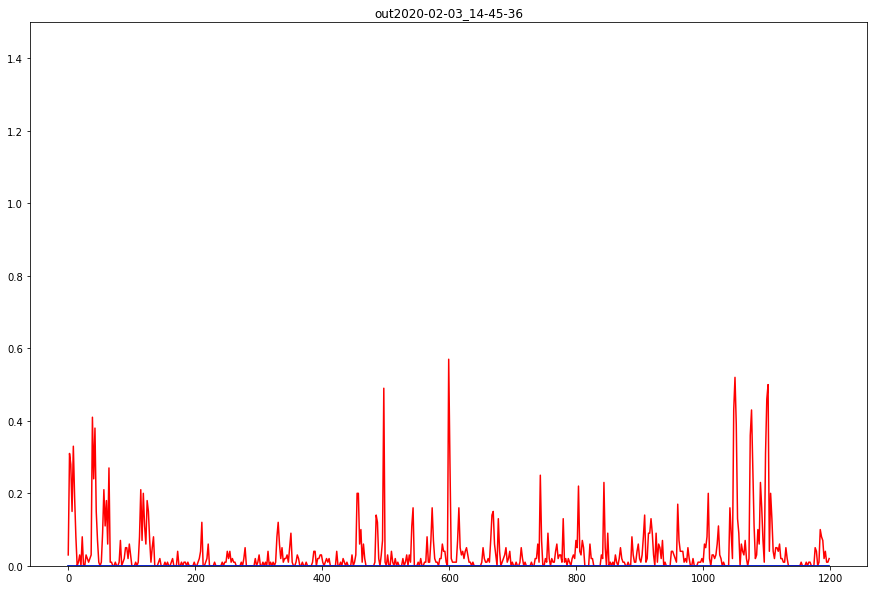

[[594  10]
 [  0   0]]
out2020-01-31_13-10-13 [1.0, 0.9604166666666667, 0.9834437086092715]


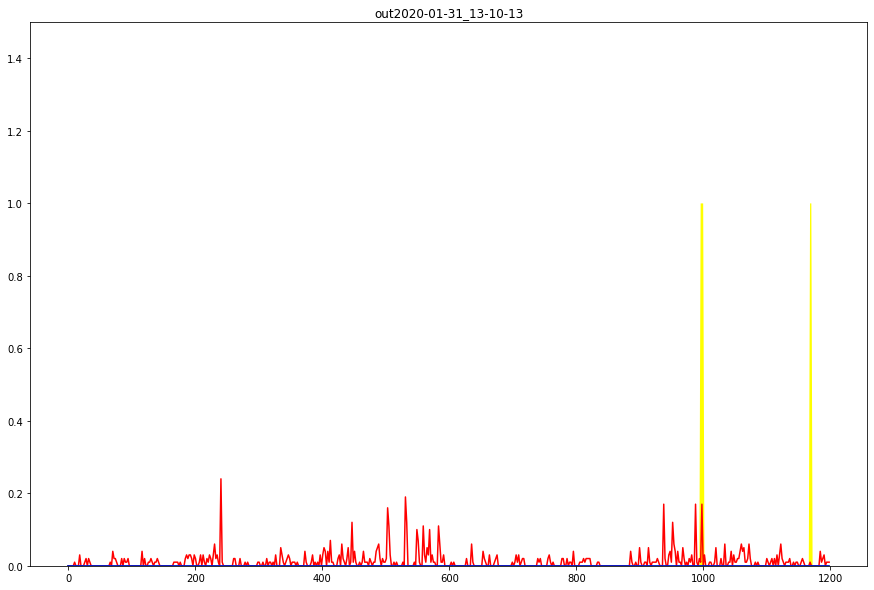

[[100  18]
 [  1   4]]
out2020-02-10_08-57-44 [1.0, 0.9508305647840531, 0.8455284552845529]


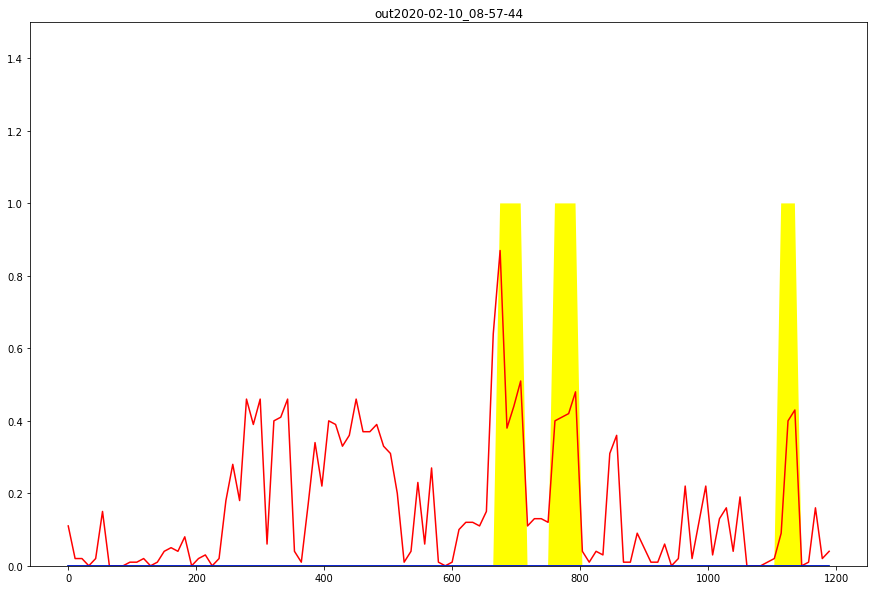

[[274 440]
 [  5 114]]
out2020-02-07_15-14-00 [1.0, 0.9696541990119972, 0.4657863145258103]


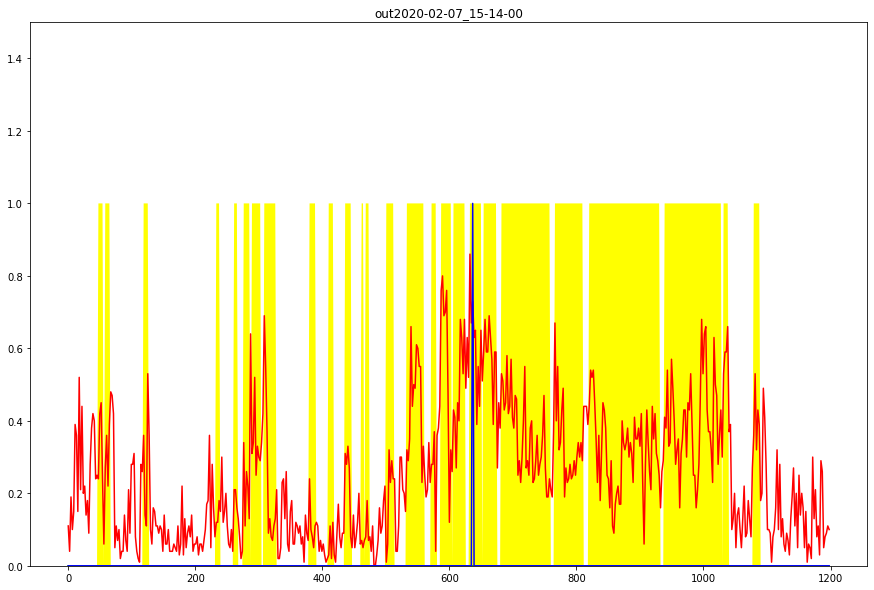

[[600]]
out2020-02-06_14-39-28 [1.0, 0.9435650378527185, 1.0]


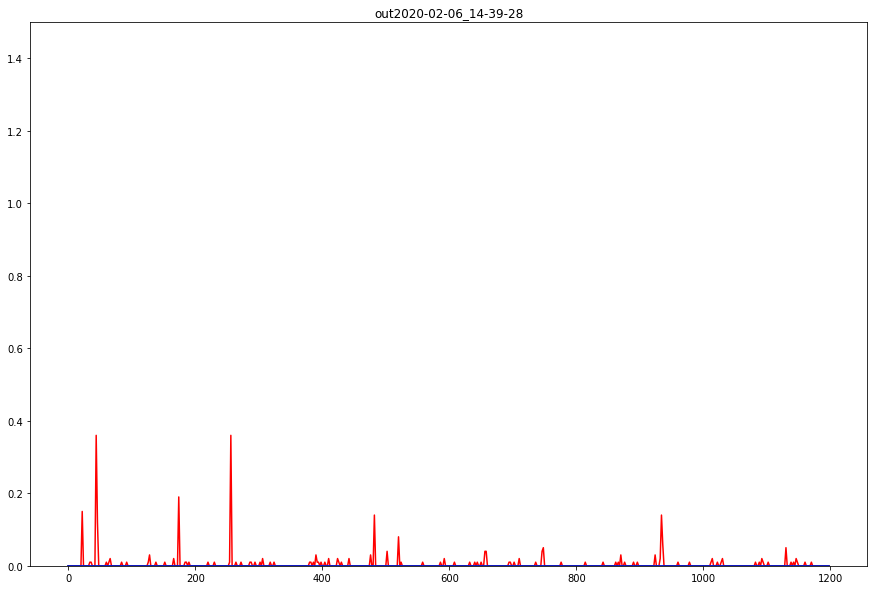

[[376  98]
 [ 93 128]]
out2020-02-07_14-52-17 [1.0, 0.9534722222222223, 0.7251798561151079]


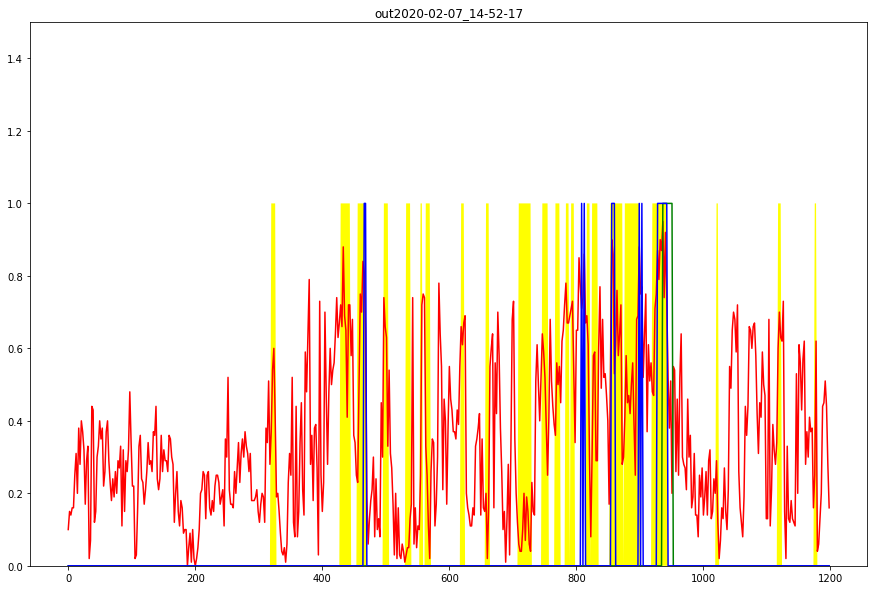

[[490 186]
 [  1  30]]
out2020-01-31_08-34-15 [1.0, 0.945054945054945, 0.7355021216407355]


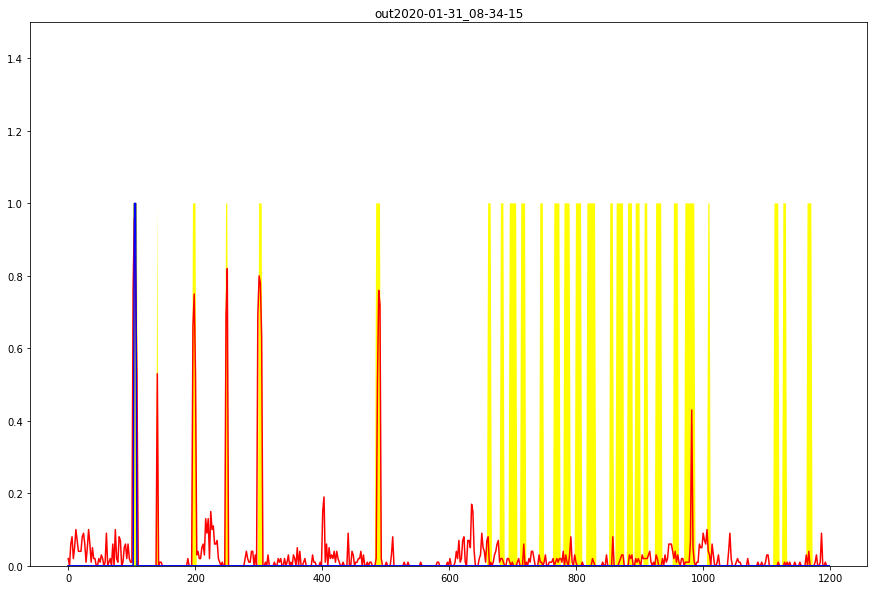

[[521]]
out2020-02-11_14-42-33 [1.0, 0.9346049046321526, 1.0]


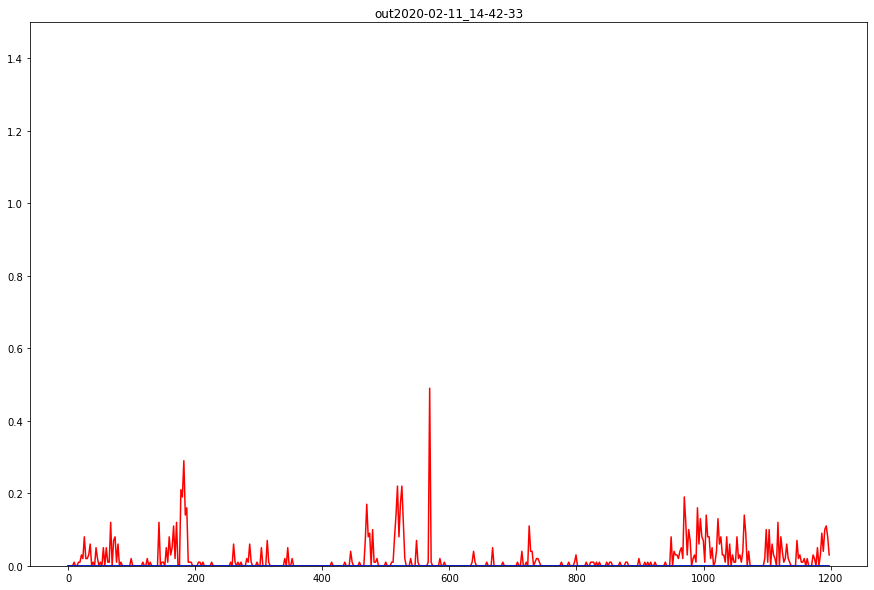

[[596   0]
 [  1   0]]
out2020-02-03_13-03-20 [1.0, 0.9364754098360656, 0.998324958123953]


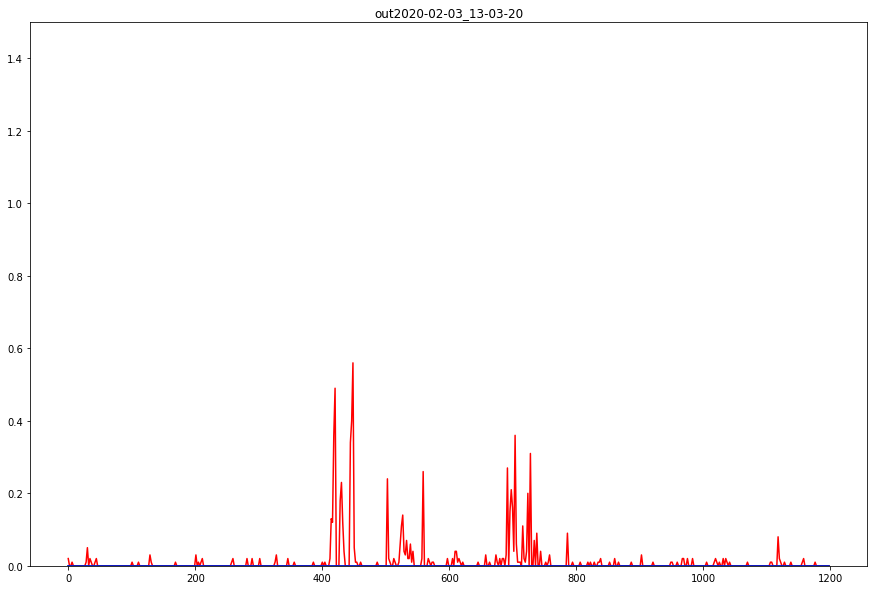

[[552  24]
 [  5  60]]
out2020-02-04_14-02-51 [1.0, 0.9489655172413793, 0.9547581903276131]


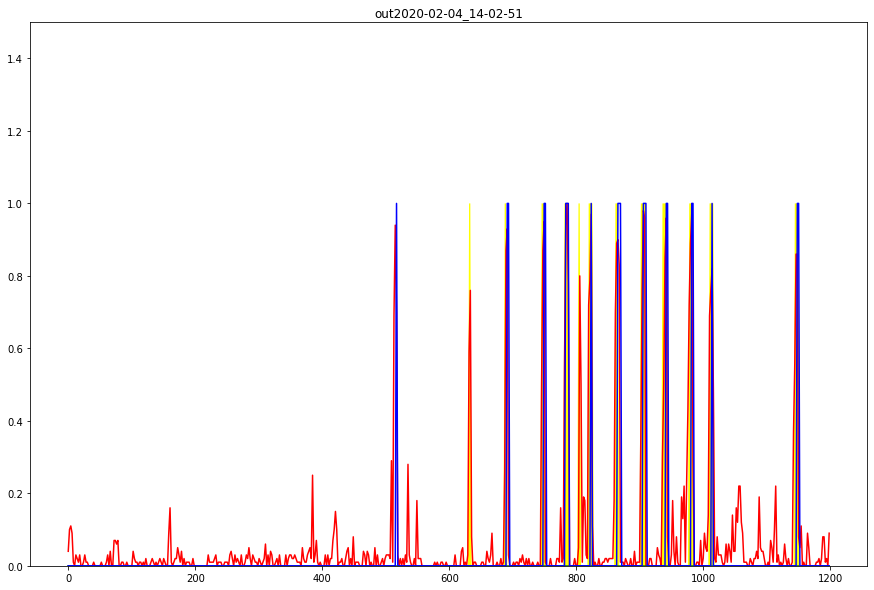

[[599]]
out2020-02-05_15-16-07 [1.0, 0.9497936726272352, 1.0]


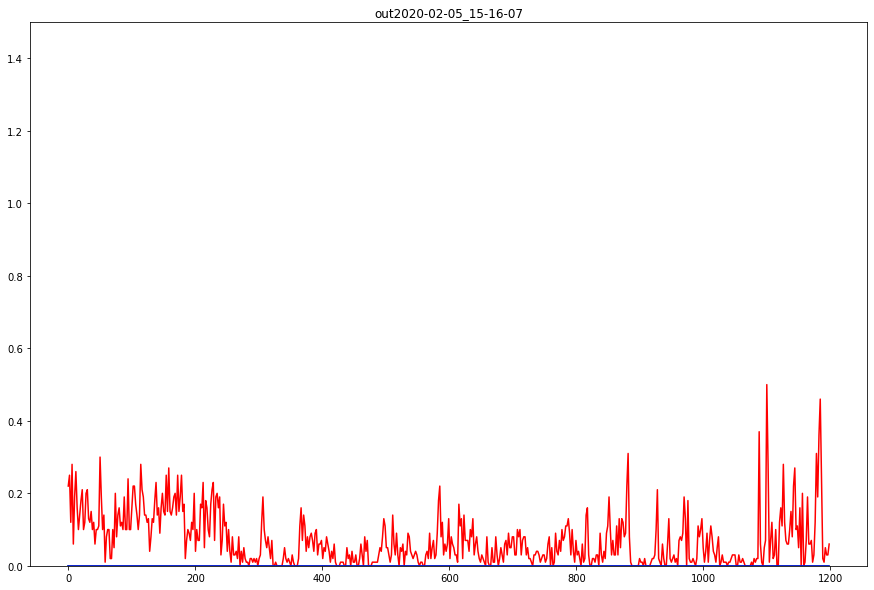

[[594  12]
 [  0   0]]
out2020-02-05_15-40-50 [1.0, 0.9546079779917469, 0.9801980198019802]


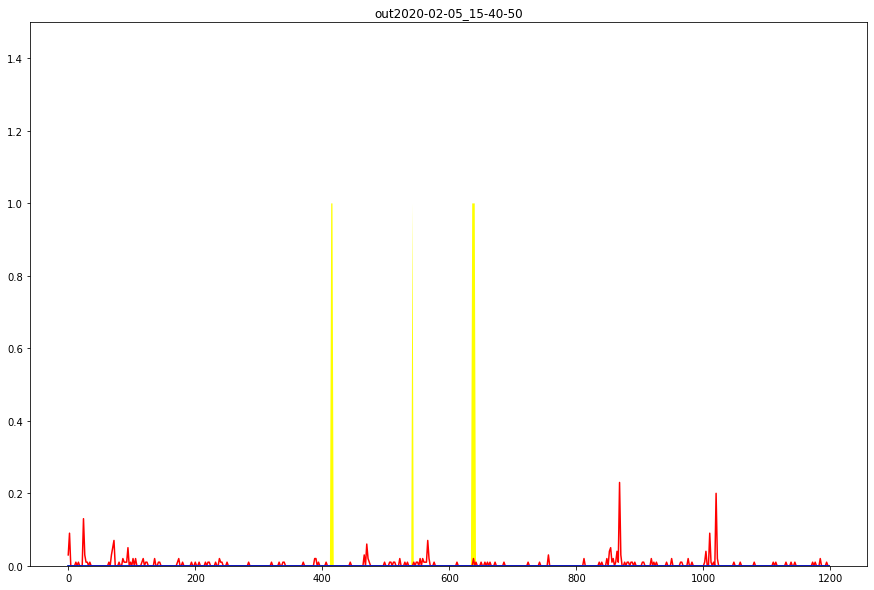

[[600]]
out2020-02-03_13-29-58 [1.0, 0.9288645690834473, 1.0]


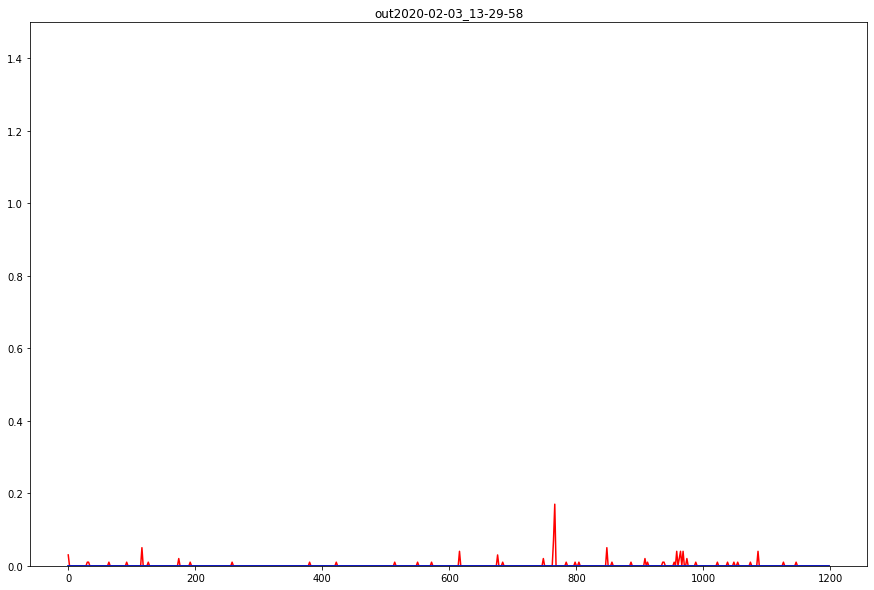

[[597   4]
 [  0   0]]
out2020-02-05_13-40-33 [1.0, 0.9449035812672176, 0.9933444259567388]


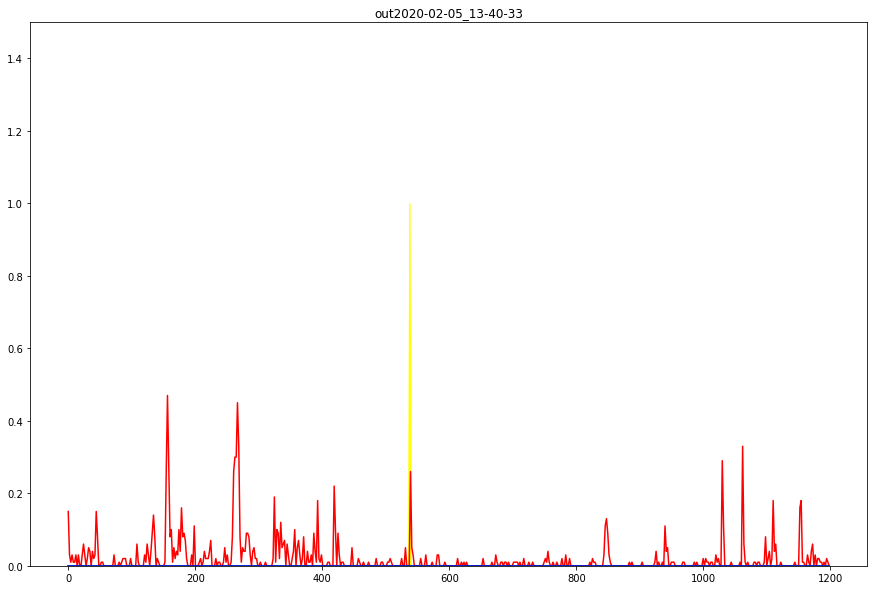

[[558]]
out2020-02-11_14-20-01 [1.0, 0.9492455418381345, 1.0]


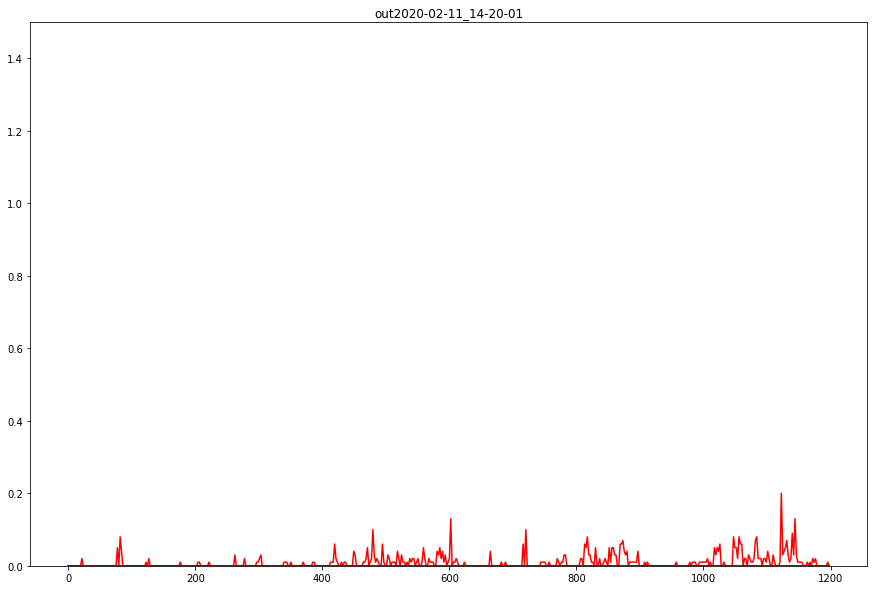

[[599]]
out2020-02-05_14-02-29 [1.0, 0.9438356164383561, 1.0]


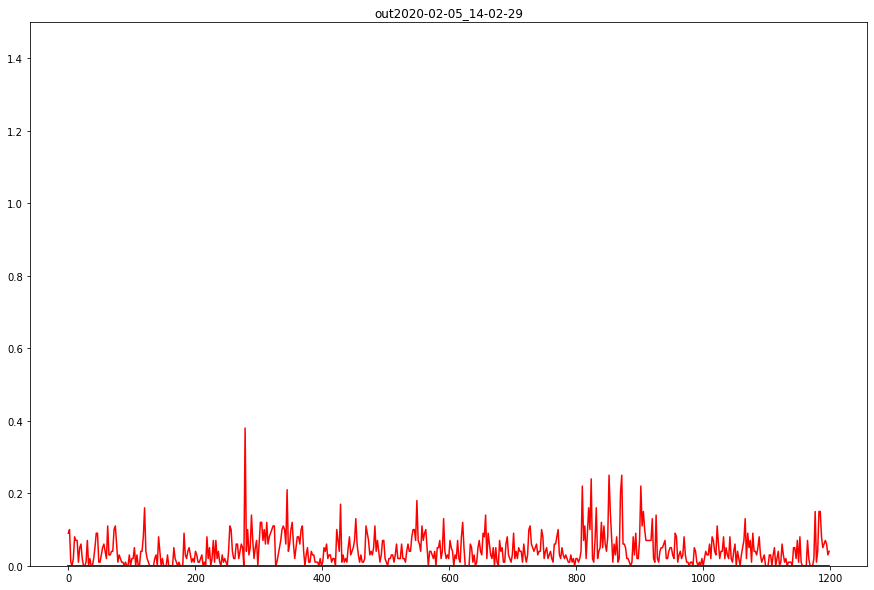

[[597   0]
 [  3   0]]
out2020-02-06_15-11-15 [1.0, 0.9404109589041096, 0.995]


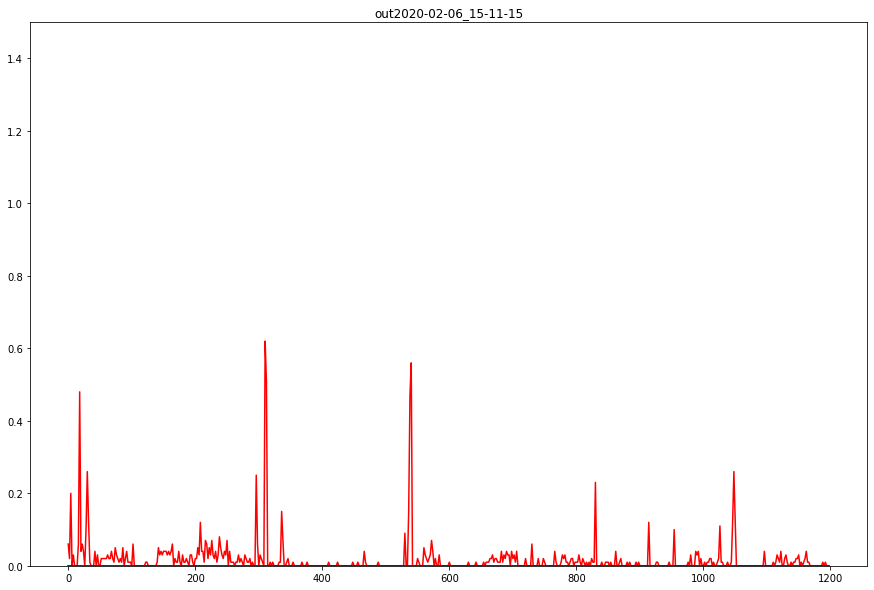

[[599   0]
 [  1   0]]
out2020-02-03_14-23-37 [1.0, 0.9280328992460589, 0.9983333333333333]


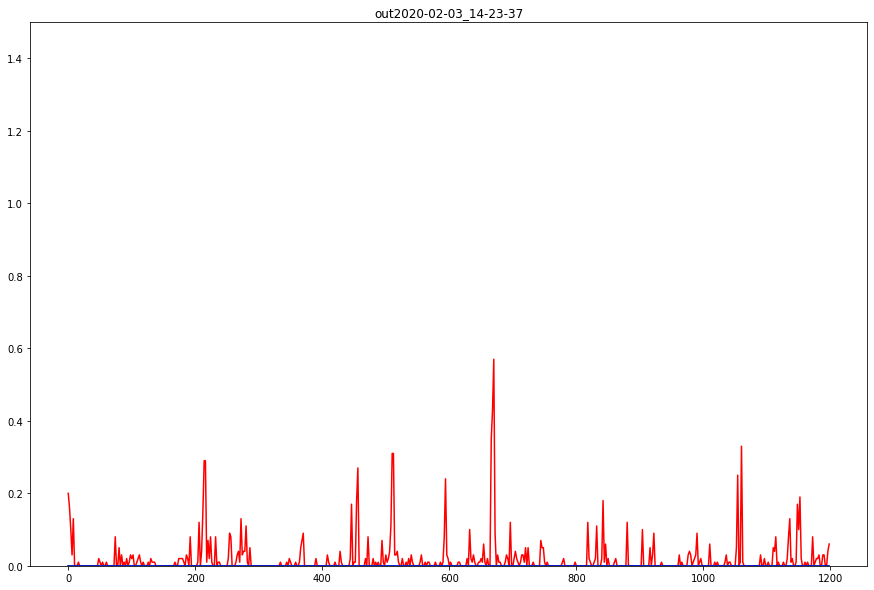

[[529 128]
 [  3   4]]
out2020-01-30_15-49-43 [1.0, 0.929945054945055, 0.802710843373494]


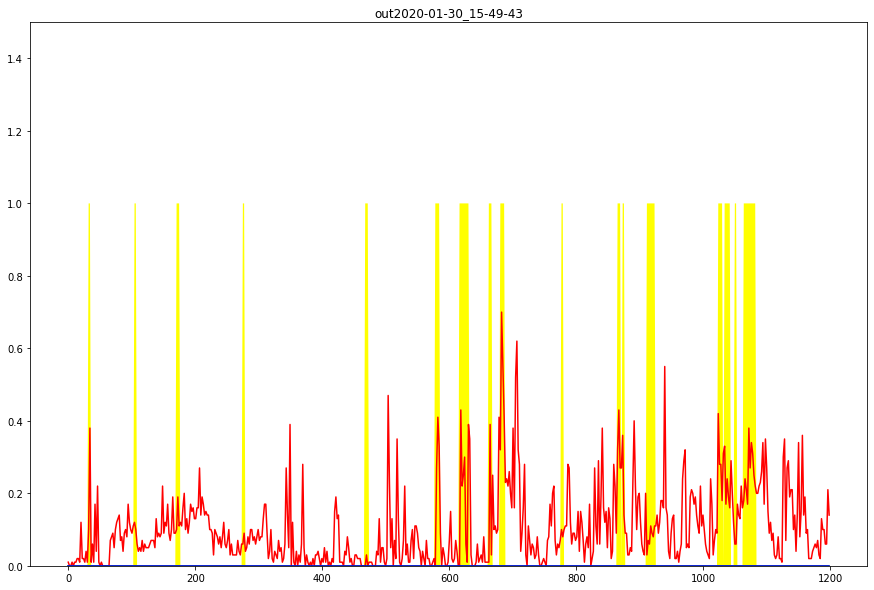

[[600]]
out2020-02-04_13-26-16 [1.0, 0.937414030261348, 1.0]


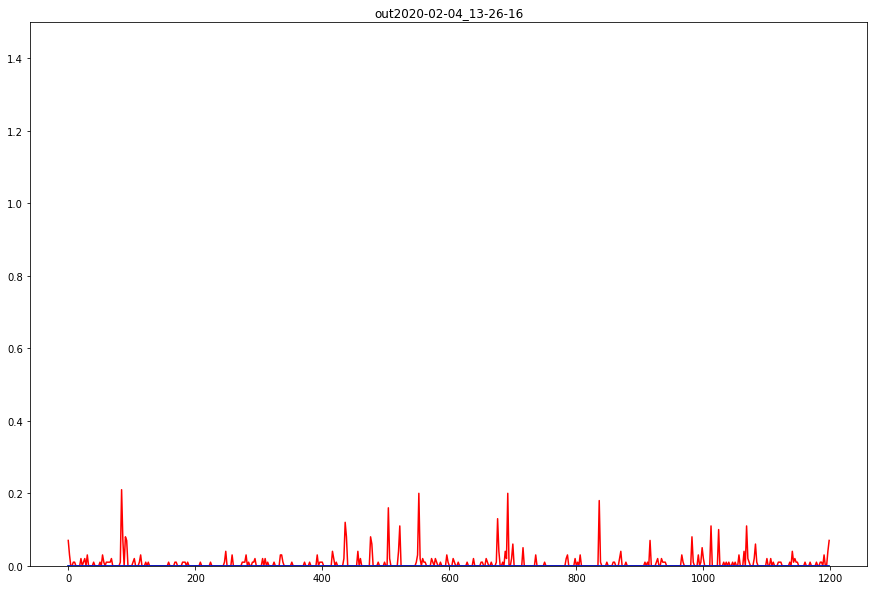

[[574  20]
 [  3  24]]
out2020-02-05_16-36-55 [1.0, 0.9534722222222223, 0.9629629629629629]


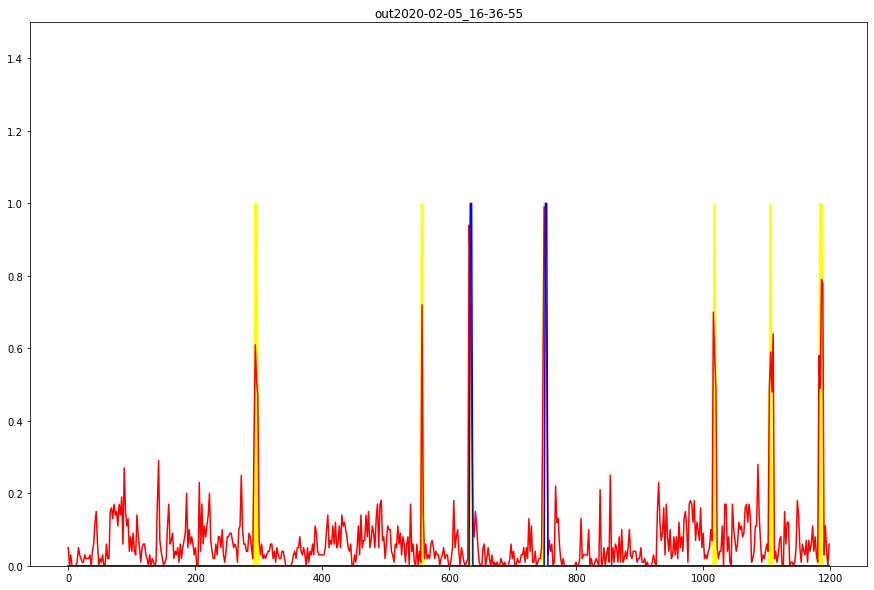

[[596   6]
 [  0   0]]
out2020-01-30_15-26-58 [1.0, 0.9438356164383561, 0.9900332225913622]


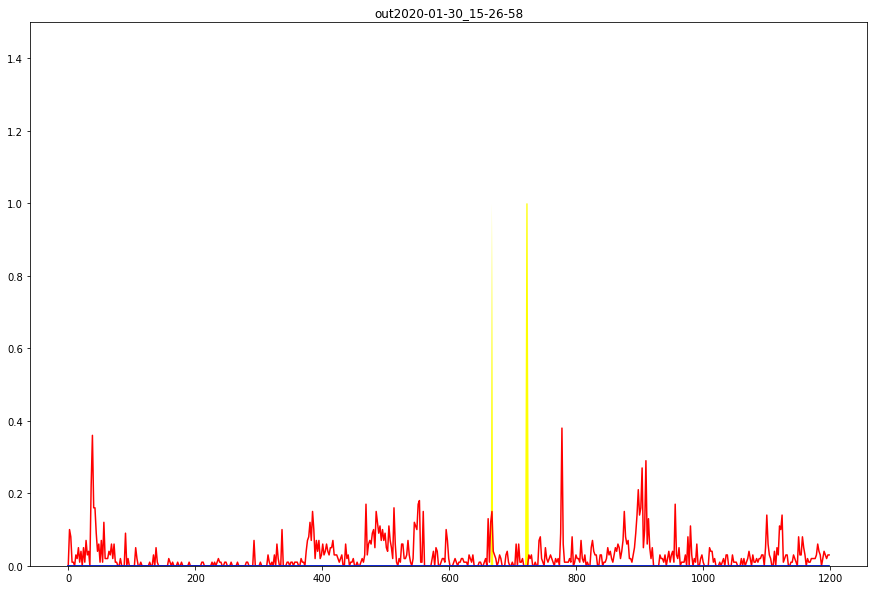

[[576   0]
 [ 22   0]]
out2020-01-30_16-18-34 [1.0, 0.9479095270733379, 0.9632107023411371]


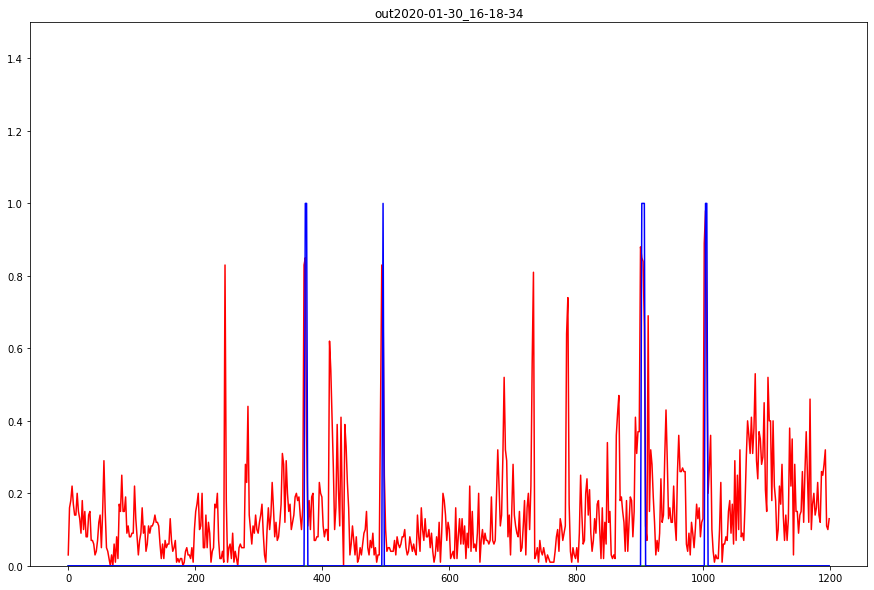

[[531 104]
 [  0  32]]
out2020-02-05_16-13-57 [1.0, 0.9544513457556936, 0.8440779610194903]


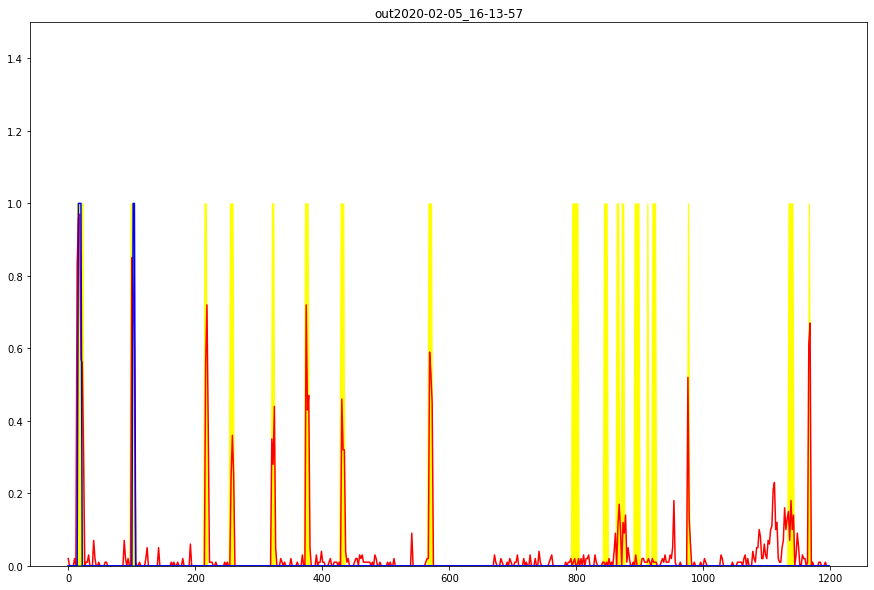

[[549  26]
 [  4  66]]
out2020-02-04_14-30-50 [1.0, 0.9488243430152143, 0.9534883720930233]


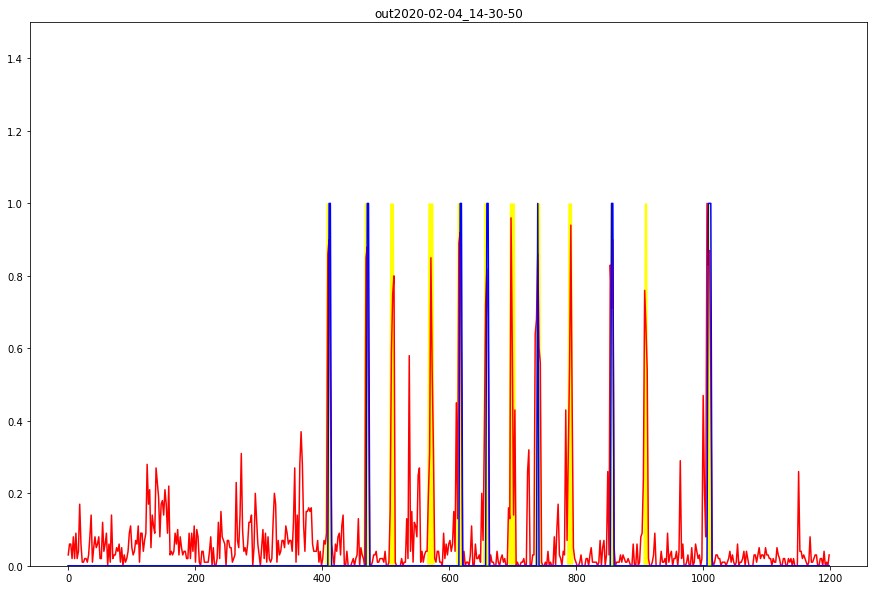

[[35]]
out2020-02-14_13-13-49 [1.0, 0.9394338380513496, 1.0]


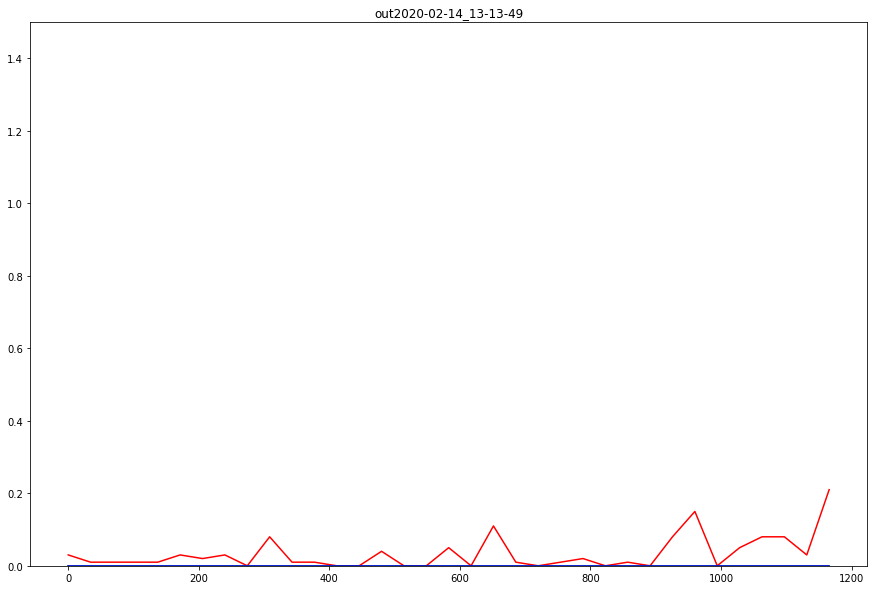

N= 26
0.9303286365360368 1.0 0.9456532992193255


In [23]:
from sklearn.linear_model import LogisticRegression
runtest(LogisticRegression)  
#runtest(RandomForestClassifier)  

## 儲存Model

In [ ]:
#for i in result_matrix:
#    print(i)

In [ ]:
#Path('clf_weights_20200911.bin').write_bytes(clf.coef_.tobytes()+clf.intercept_.tobytes())
#print(clf.coef_)
#print(clf.intercept_)